In [27]:
import numpy as np
import pandas as pd
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set()

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.datasets import make_classification
from collections import Counter


In [28]:
df = pd.read_csv('Suma_todasLasSesiones.csv')
df = df.drop(['Sesion','Id','Fsm'], axis=1)
df.describe()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Nota
count,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000
mean,11.950339,15.381490,39.442438,1524.015801,196.909707,749.808126,204.862302,167.162528,3.679458
std,27.766516,58.953324,94.480998,1206.571899,208.987466,817.276606,282.163830,273.719149,1.226114
min,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,5.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,332.500000,16.000000,309.000000,62.000000,46.000000,3.000000
50%,2.000000,1.000000,5.000000,1426.000000,173.000000,515.000000,129.000000,98.000000,4.000000
75%,9.000000,3.000000,22.500000,2438.500000,309.000000,856.500000,253.000000,194.000000,5.000000
max,258.000000,729.000000,780.000000,4543.000000,1162.000000,4894.000000,2733.000000,2167.000000,5.000000


In [32]:
X = df.drop(['Nota'],1)
#scaler = MinMaxScaler()
#x = scaler.fit_transform(X)
#clusters = scaler.fit_transform(df[['Nota']])


In [33]:
ros = RandomOverSampler(random_state=0)

In [37]:
X = df[(df['Study'] >1) & (df['Study'] > 1)&(df['Properties'] > 38)&(df['Blank'] > 253)]
clusters = X[['Nota']]

X_resampled, y_resampled = ros.fit_resample(X, clusters)

In [38]:
print(sorted(Counter(y_resampled).items()))

[('Nota', 1)]


In [39]:
len(X_resampled)

108

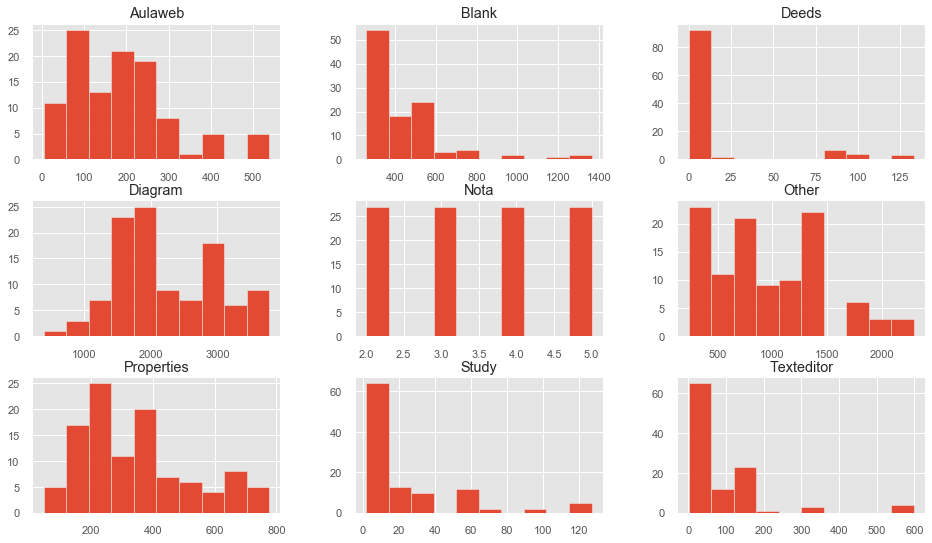

In [40]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
datos = X_resampled.hist()
plt.grid(True)
plt.show()

In [44]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_resampled)
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled, y_resampled, test_size=0.10)

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
labels = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_
accuracy_score(Y_test, labels)

0.09090909090909091